In [90]:
# ---- Task 1: Data Loading and Exploration ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
# Load dataset
df = pd.read_csv("house_price_data.csv")

In [94]:
# Basic info
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (8000, 25)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_id              8000 non-null   object 
 1   neighborhood             8000 non-null   object 
 2   distance_to_city_center  8000 non-null   float64
 3   distance_to_metro        8000 non-null   int64  
 4   distance_to_school       8000 non-null   int64  
 5   crime_rate               8000 non-null   float64
 6   house_age                8000 non-null   int64  
 7   total_area               8000 non-null   int64  
 8   bedrooms                 8000 non-null   int64  
 9   bathrooms                8000 non-null   int64  
 10  floors                   8000 non-null   int64  
 11  garage                   8000 non-null   int64  
 12  garden                   8000 non-null   int64  
 13  basement                 8000 non-null   int64  
 14 

In [96]:
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary statistics:\n", df.describe())


Missing values:
 property_id                0
neighborhood               0
distance_to_city_center    0
distance_to_metro          0
distance_to_school         0
crime_rate                 0
house_age                  0
total_area                 0
bedrooms                   0
bathrooms                  0
floors                     0
garage                     0
garden                     0
basement                   0
balcony                    0
construction_quality       0
renovation_status          0
heating_type               0
air_conditioning           0
parking_spaces             0
energy_efficiency          0
listing_duration           0
season_sold                0
year_sold                  0
sale_price                 0
dtype: int64

Summary statistics:
        distance_to_city_center  distance_to_metro  distance_to_school  \
count              8000.000000        8000.000000         8000.000000   
mean                  3.785213         337.536250          148.724875   
std

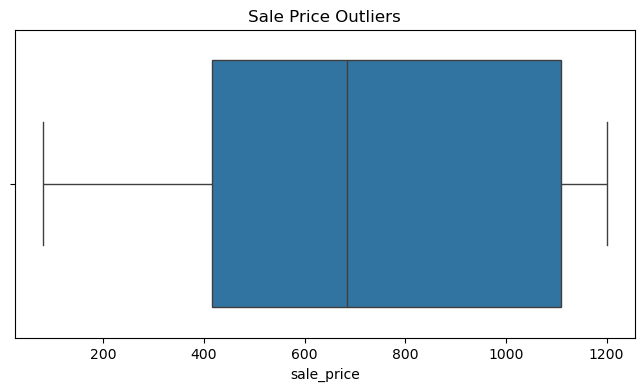

In [98]:
# ---- Outlier detection ----
plt.figure(figsize=(8,4))
sns.boxplot(x=df['sale_price'])
plt.title("Sale Price Outliers")
plt.show()

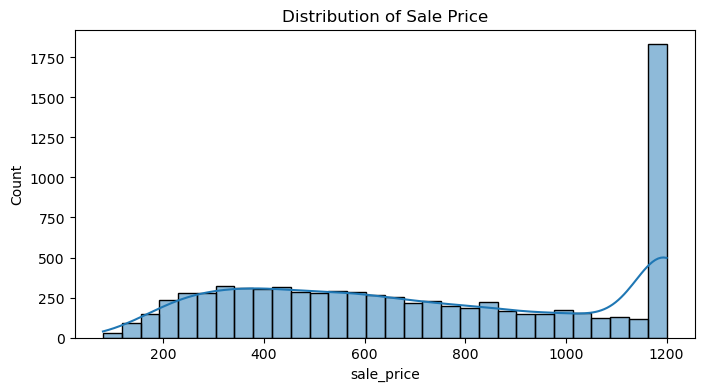

Skewness of Sale Price: 0.07300029773629817


In [100]:
# ---- Task 2: Exploratory Data Analysis ----
# Distribution of target variable
plt.figure(figsize=(8,4))
sns.histplot(df['sale_price'], kde=True, bins=30)
plt.title("Distribution of Sale Price")
plt.show()

print("Skewness of Sale Price:", df['sale_price'].skew())

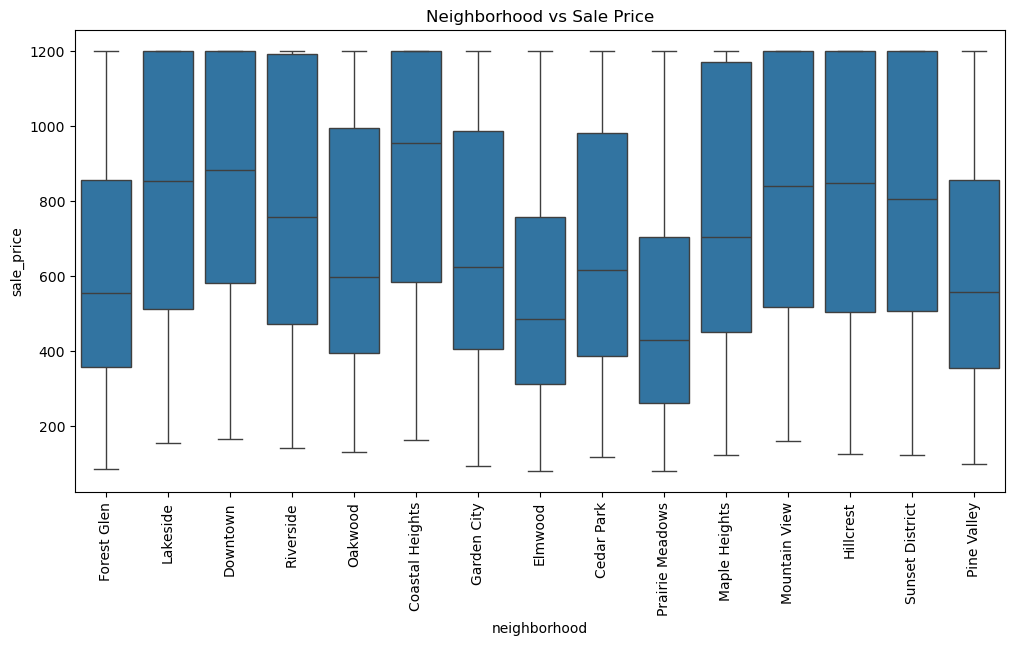

In [101]:
# Neighborhood impact
plt.figure(figsize=(12,6))
sns.boxplot(x='neighborhood', y='sale_price', data=df)
plt.xticks(rotation=90)
plt.title("Neighborhood vs Sale Price")
plt.show()

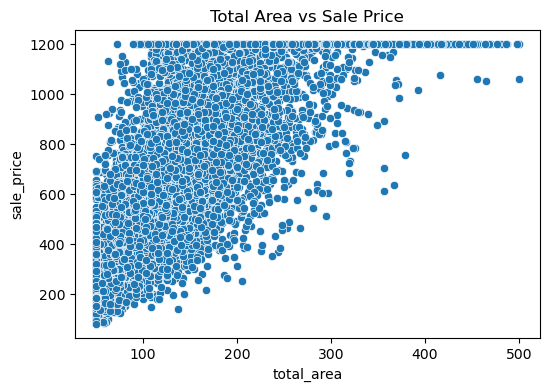

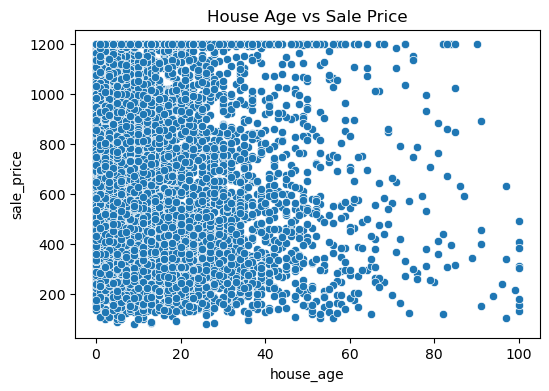

In [103]:
# Scatterplots for numerical features
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_area', y='sale_price', data=df)
plt.title("Total Area vs Sale Price")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='house_age', y='sale_price', data=df)
plt.title("House Age vs Sale Price")
plt.show()

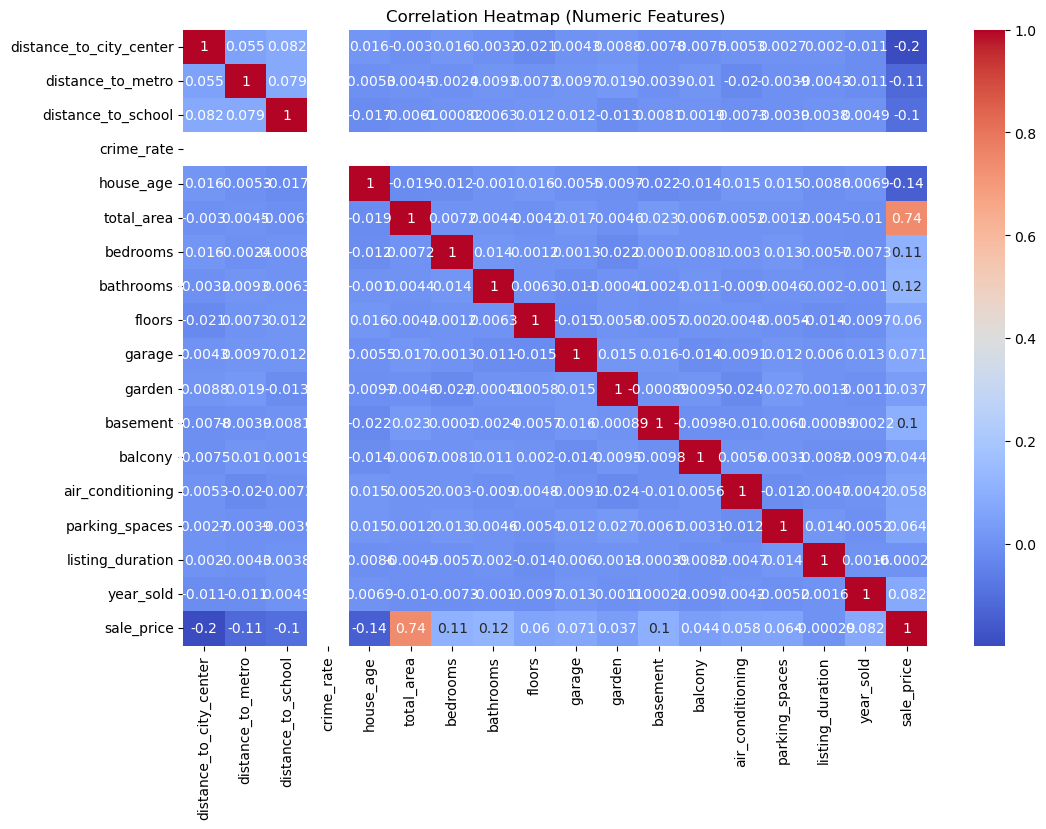

In [105]:
# Correlation heatmap (numeric only to avoid error)
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [107]:
# ---- Task 3: Feature Engineering & Preprocessing ----
# Drop property_id (not useful)
df = df.drop(columns=['property_id'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features & target
X = df_encoded.drop(columns=['sale_price'])
y = df_encoded['sale_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (6400, 46)
Test set size: (1600, 46)


In [108]:
# ---- Task 4: Model Development ----
lr = LinearRegression()
lr.fit(X_train, y_train)
print("model development done")

model development done


In [109]:
# ---- Task 5: Model Evaluation ----
y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


Model Evaluation Metrics:
MAE: 111.11273218631446
MSE: 20388.466539303634
RMSE: 142.7881876742738
R2 Score: 0.8326000477212703


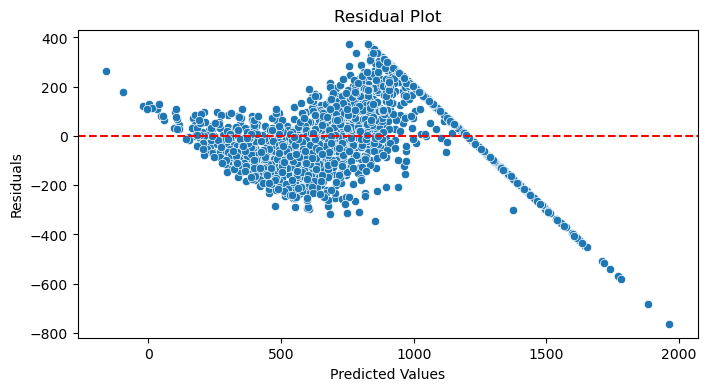

In [110]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

In [116]:
# ---- Feature Importance (Coefficients) ----
coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nTop Features influencing Sale Price:")
print(coefficients.head(10))
print("\nBottom Features influencing Sale Price:")
print(coefficients.tail(10))


Top Features influencing Sale Price:
                          Feature  Coefficient
31   construction_quality_Premium   256.341750
25     neighborhood_Mountain View   175.107542
17   neighborhood_Coastal Heights   171.391175
18          neighborhood_Downtown   166.987879
23          neighborhood_Lakeside   140.313217
22         neighborhood_Hillcrest   137.065789
30   neighborhood_Sunset District   116.927569
32  construction_quality_Standard   102.920215
29         neighborhood_Riverside    96.177144
24     neighborhood_Maple Heights    81.730251

Bottom Features influencing Sale Price:
                         Feature  Coefficient
38           energy_efficiency_C   -33.205968
45            season_sold_Winter   -38.792695
39           energy_efficiency_D   -45.930545
40           energy_efficiency_E   -54.220037
19          neighborhood_Elmwood   -70.186734
41           energy_efficiency_F   -91.120530
34     renovation_status_Partial   -93.430857
42           energy_efficiency_G  -1